## Практическое задание

1. Для реализованной модели градиентного бустинга постройте графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделайте выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
    # было
#     predictions = np.array(
#         [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
#     )

    # стало
    predictions = np.array(
        sum([eta * alg.predict(X) for alg in trees_list])
    )
    
    return predictions

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def residual(y, z):
    return - (z - y)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    # Деревья будем записывать в список
    trees = []
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)   
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        trees.append(tree)  
    return trees, train_errors, test_errors

In [14]:
from tqdm import tqdm


eta = 1
max_depths = range(1, 11)


def plot_different_max_depths(n_trees=3, max_depths=max_depths):
    train_errors_depths = []
    test_errors_depths = []

    for max_depth in tqdm(max_depths):
        _, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
        train_errors_depths.append(train_errors[-1])
        test_errors_depths.append(test_errors[-1])


    print(f'Количество деревьев в бустинге {n_trees}')
    plt.plot(range(len(max_depths)), train_errors_depths, label='train_error')
    plt.plot(range(len(max_depths)), test_errors_depths, label='test_error')
    plt.xlabel('Глубина дерева')
    plt.ylabel('MSE')
    plt.legend()

100%|██████████| 10/10 [00:01<00:00,  6.30it/s]


Количество деревьев в бустинге 10


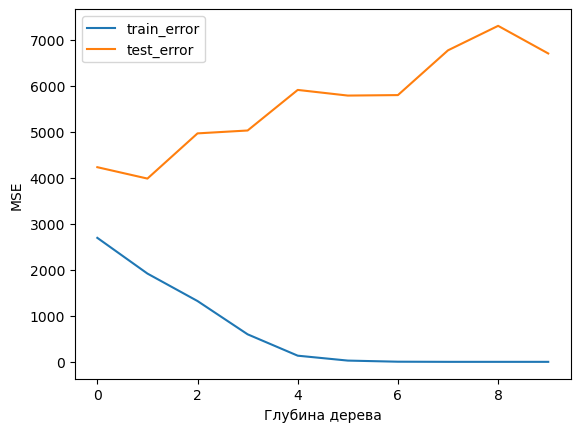

In [15]:
plot_different_max_depths(max_depths=max_depths, n_trees=10)

In [33]:
eta = 0.1
n_trees = range(1, 40, 1)

def plot_different_num_trees(n_trees=n_trees, max_depth=3):
    train_errors_trees = []
    test_errors_trees = []
    for n in tqdm(n_trees):
        _, train_errors, test_errors = gb_fit(n, max_depth, X_train, X_test, y_train, y_test, eta)
        train_errors_trees.append(train_errors[-1])
        test_errors_trees.append(test_errors[-1])
    print(f'Максимальная глубина дерева {max_depth}')
    plt.plot(n_trees, train_errors_trees, label='train_error')
    plt.plot(n_trees, test_errors_trees, label='test_error')
    plt.xlabel('Количество алгоритмов в бустинге')
    plt.ylabel('MSE')
    plt.xticks(n_trees, n_trees)
    plt.legend()

100%|██████████| 39/39 [00:11<00:00,  3.43it/s]


Максимальная глубина дерева 3


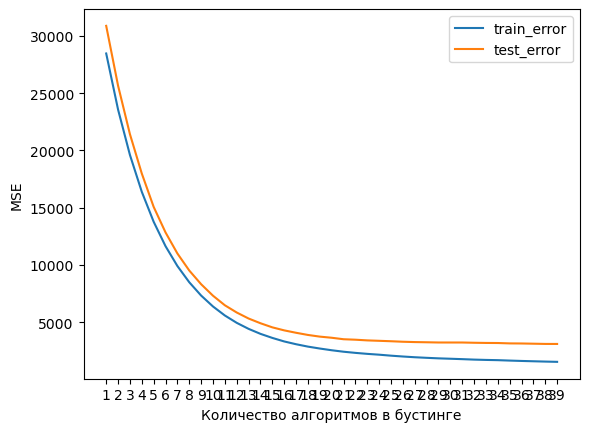

In [34]:
plot_different_num_trees(n_trees=n_trees, max_depth=3)

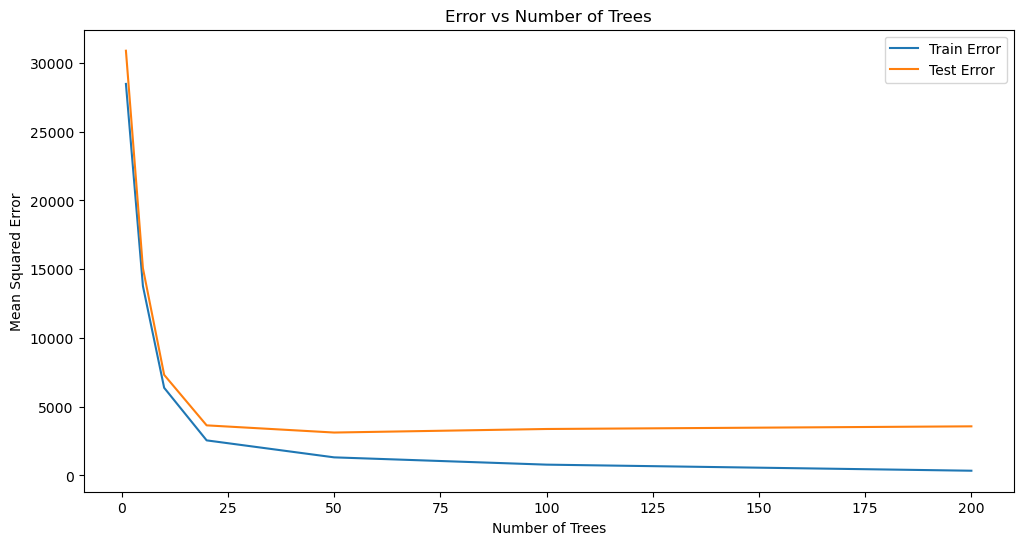

In [64]:
# Параметры
eta = 0.1
n_trees_values = [1, 5, 10, 20, 50, 100, 200]
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# График зависимости ошибки от количества деревьев
train_errors_ntrees = []
test_errors_ntrees = []
fixed_max_depth = 3

for n_trees in n_trees_values:
    _, train_errors, test_errors = gb_fit(n_trees, fixed_max_depth, X_train, X_test, y_train, y_test, eta)
    train_errors_ntrees.append(train_errors[-1])
    test_errors_ntrees.append(test_errors[-1])

plt.figure(figsize=(12, 6))
plt.plot(n_trees_values, train_errors_ntrees, label='Train Error')
plt.plot(n_trees_values, test_errors_ntrees, label='Test Error')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Error vs Number of Trees')
plt.legend()
plt.show()

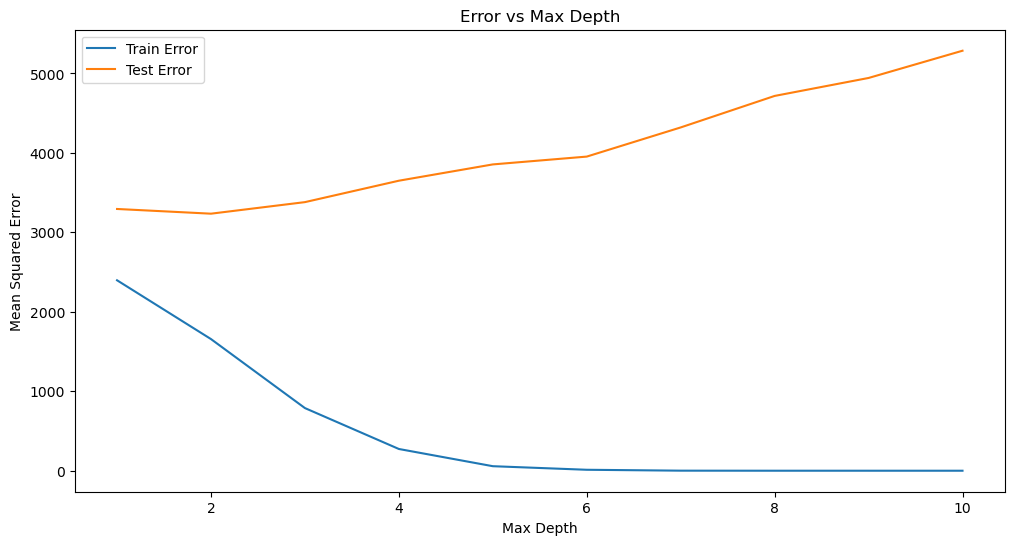

In [65]:
# График зависимости ошибки от максимальной глубины деревьев
train_errors_depth = []
test_errors_depth = []
fixed_n_trees = 100

for max_depth in max_depth_values:
    _, train_errors, test_errors = gb_fit(fixed_n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
    train_errors_depth.append(train_errors[-1])
    test_errors_depth.append(test_errors[-1])

plt.figure(figsize=(12, 6))
plt.plot(max_depth_values, train_errors_depth, label='Train Error')
plt.plot(max_depth_values, test_errors_depth, label='Test Error')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Error vs Max Depth')
plt.legend()
plt.show()

### Выводы

**Зависимость ошибки от количества деревьев в ансамбле:**

С увеличением количества деревьев ошибка на тестовой выборке сначала уменьшается, так как модель становится более мощной и лучше обучается.
Однако после определенного количества деревьев тестовая ошибка может начать расти, что указывает на переобучение, когда модель начинает слишком точно подстраиваться под обучающие данные и хуже обобщает на новых данных.

**Зависимость ошибки от максимальной глубины деревьев:**

С увеличением максимальной глубины деревьев ошибка на обучающей выборке уменьшается, так как более глубокие деревья могут лучше подстраиваться под обучающие данные.
Однако ошибка на тестовой выборке может начать увеличиваться с некоторого момента, что указывает на переобучение. Слишком глубокие деревья могут моделировать шум в данных, что ухудшает их обобщающую способность на новых данных.
Эти графики и выводы помогают понять, как настраивать гиперпараметры градиентного бустинга для достижения оптимального баланса между точностью и обобщающей способностью модели.

2. Модифицируйте реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки примите равным 0.5. Сравните на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [53]:
def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, sample_coef=0.5):
    n_samples = X_train.shape[0] 
    # Деревья будем записывать в список
    trees = []
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        indices = np.random.randint(0, n_samples, int(n_samples * sample_coef))
        X_train_sampled, y_train_sampled = X_train[indices], y_train[indices]
        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:    
            # обучаем первое дерево на случайной половине обучающей выборке            
            tree.fit(X_train_sampled, y_train_sampled)    
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train_sampled, trees, eta)   
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_sampled, residual(y_train_sampled, target))  
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        trees.append(tree)
    return trees, train_errors, test_errors

In [58]:
n_trees = 50  # количество деревьев
max_depth = 3 # глубина дерева
eta = 0.3 # коэффициент для градиентного спуска(шаг)
sample_coef = 0.5 # объем выборки от исходных данных для стохастического градиентного бустинга

In [59]:
%%time
_, train_errors_gb, test_errors_gb = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

CPU times: total: 1.56 s
Wall time: 2.72 s


In [60]:
%%time
_, train_errors_sgb, test_errors_sgb = sgb_fit(n_trees, max_depth, X_train, X_test,
                                               y_train, y_test, eta, sample_coef)

CPU times: total: 1.59 s
Wall time: 2.5 s


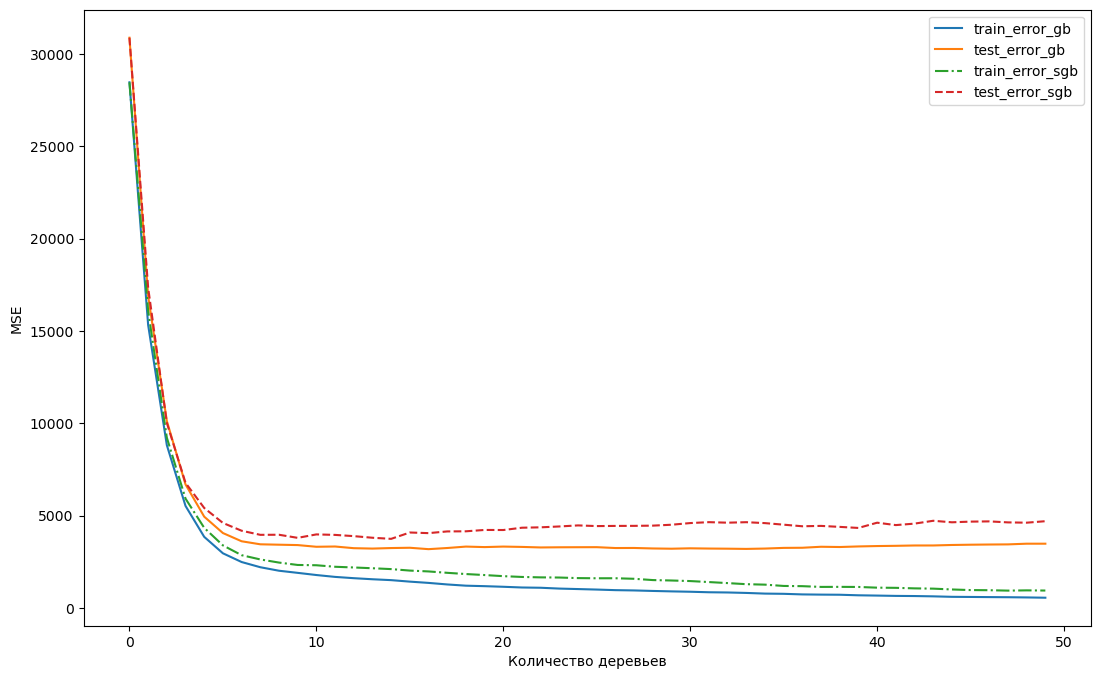

In [62]:
plt.figure(figsize=(13, 8))
plt.plot(range(n_trees), train_errors_gb, label='train_error_gb')
plt.plot(range(n_trees), test_errors_gb, label='test_error_gb')
plt.plot(range(n_trees), train_errors_sgb, label='train_error_sgb', linestyle='-.')
plt.plot(range(n_trees), test_errors_sgb, label='test_error_sgb', linestyle='--')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.legend()